In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


#Visalisations
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline


#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#from sklearn.feature_selection import chi2

#libraries for model
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("data/crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# <center> Descriptive statistics </center> #

In [3]:
# statistical description
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# <center> Visualisations <center> #

<AxesSubplot:ylabel='label'>

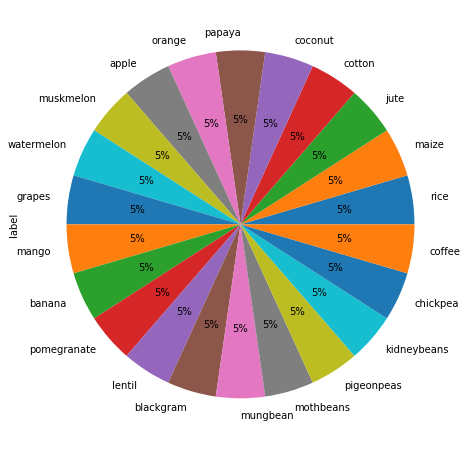

In [5]:
plt.figure(figsize=(8,8))
df['label'].value_counts().plot(kind='pie', autopct = '%1.0f%%')

In [6]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,N,P,K,temperature,humidity,ph,rainfall,label


There are no duplicated rows

In [7]:
# class distribution
print(df.groupby('label').size())

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64


No inconsistencies, 22 x 100 = 2200, all the rows had been able to categorise properly

In [8]:
#check if there is any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Reveals that there is no missing values in the dataset

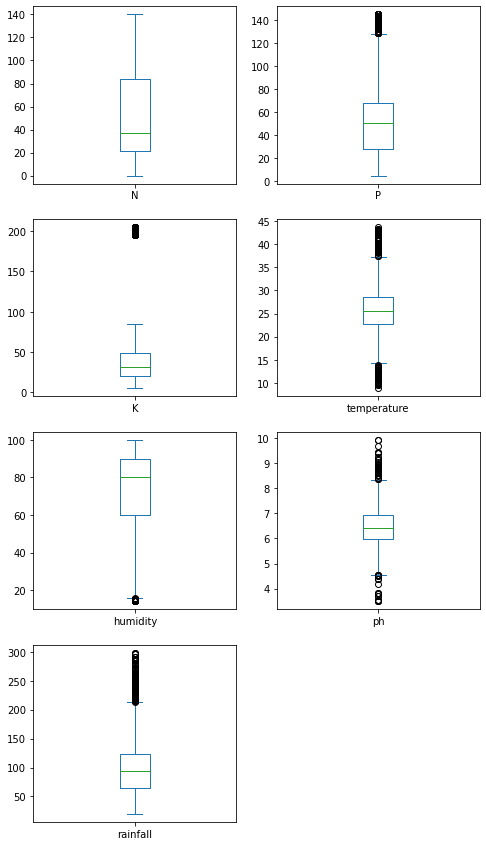

In [9]:
# Check if there is any outliers
# box and whisker plots
plt.rcParams["figure.figsize"] = [8, 15]
df.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False)
plt.show()

## Find the relationship between the crops and the conditions: ##

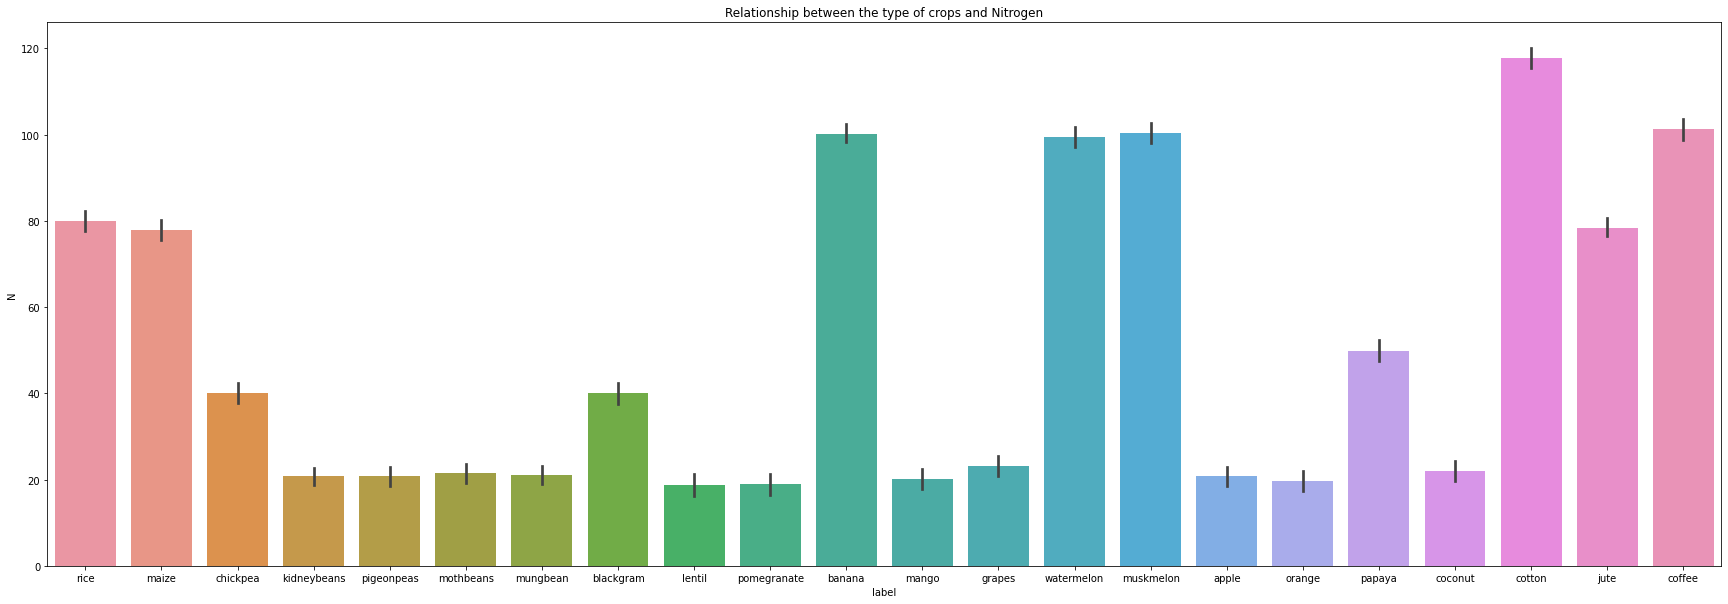

In [10]:
plt.figure(figsize=(30,10))
p =sns.barplot(y = df['N'], x = df['label']).set_title('Relationship between the type of crops and Nitrogen')

From this bar graph we can see that cotton crop requires the highest ratio of N.

Text(0.5, 1.0, 'Relationship between the type of crops and Phosphorous ')

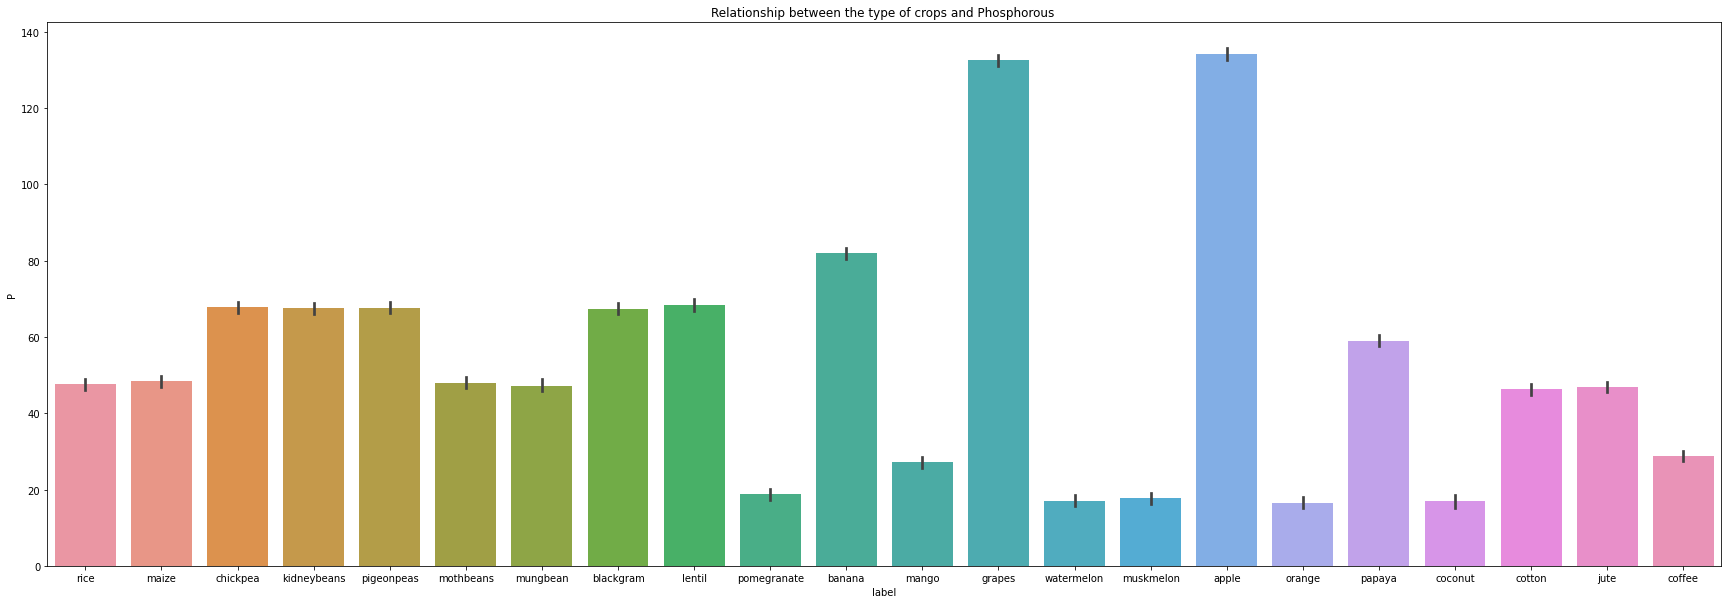

In [11]:
plt.figure(figsize=(30,10))
sns.barplot(y = df['P'], x = df['label']).set_title('Relationship between the type of crops and Phosphorous ')

From this bar chart, we can see that apple crop requires the highest ratio of P.

Text(0.5, 1.0, 'Relationship between the type of crops and Potassium ')

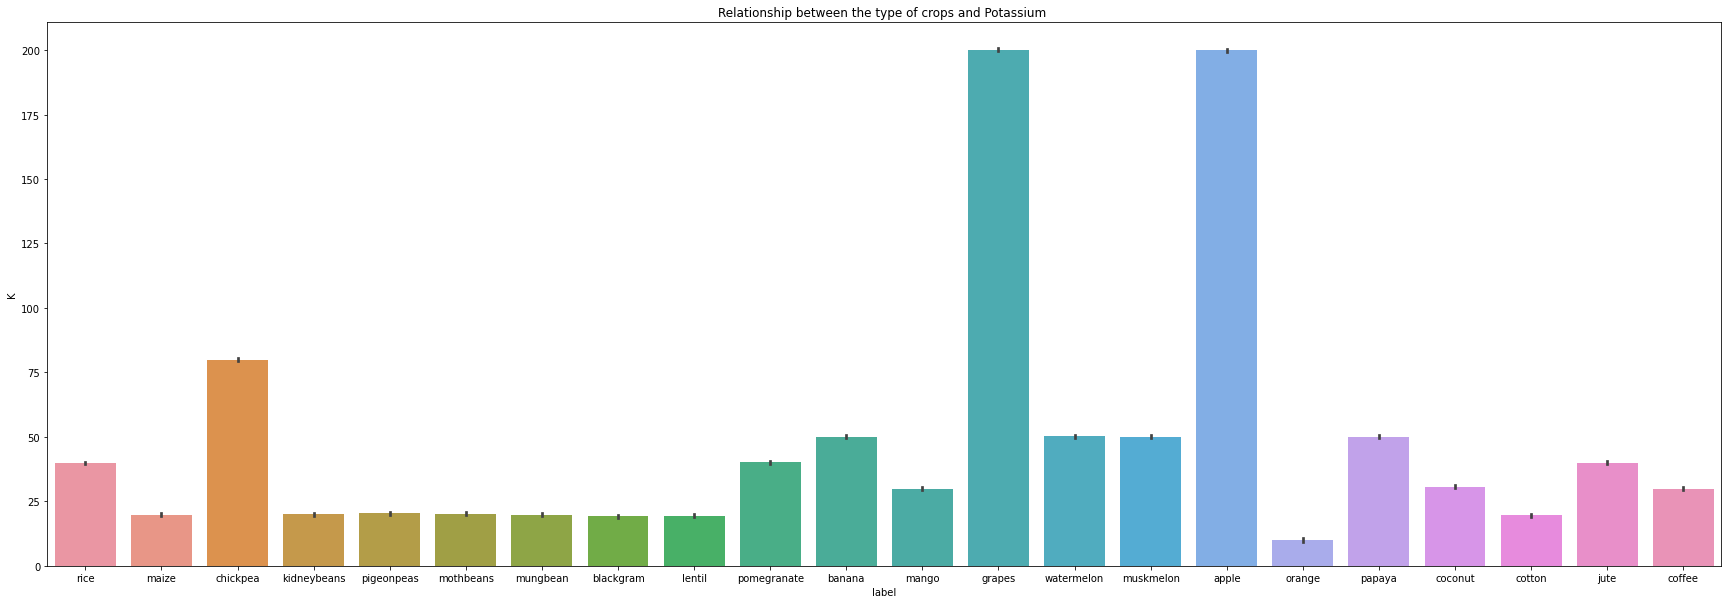

In [12]:
plt.figure(figsize=(30,10))
sns.barplot(y = df['K'], x = df['label']).set_title('Relationship between the type of crops and Potassium ')

From this bar chart, we can see that grapes and apple crops requires the highest ratio of K.

Text(0.5, 1.0, 'Relationship between the type of crops and Temperature ')

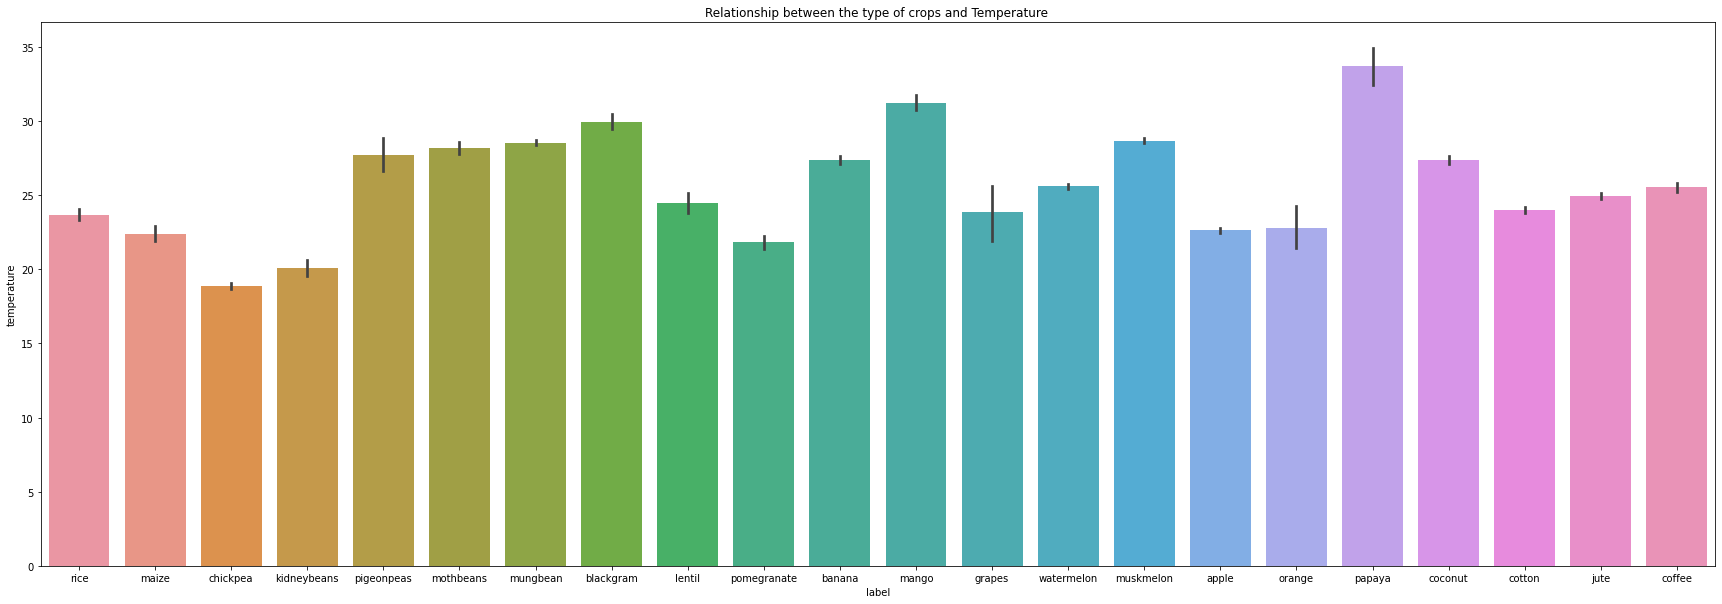

In [13]:
plt.figure(figsize=(30,10))
sns.barplot(y = df['temperature'], x = df['label']).set_title('Relationship between the type of crops and Temperature ')

From this bar chart, we can see that coconut crop requires the highest temperature.

Text(0.5, 1.0, 'Relationship between the type of crops and ph ')

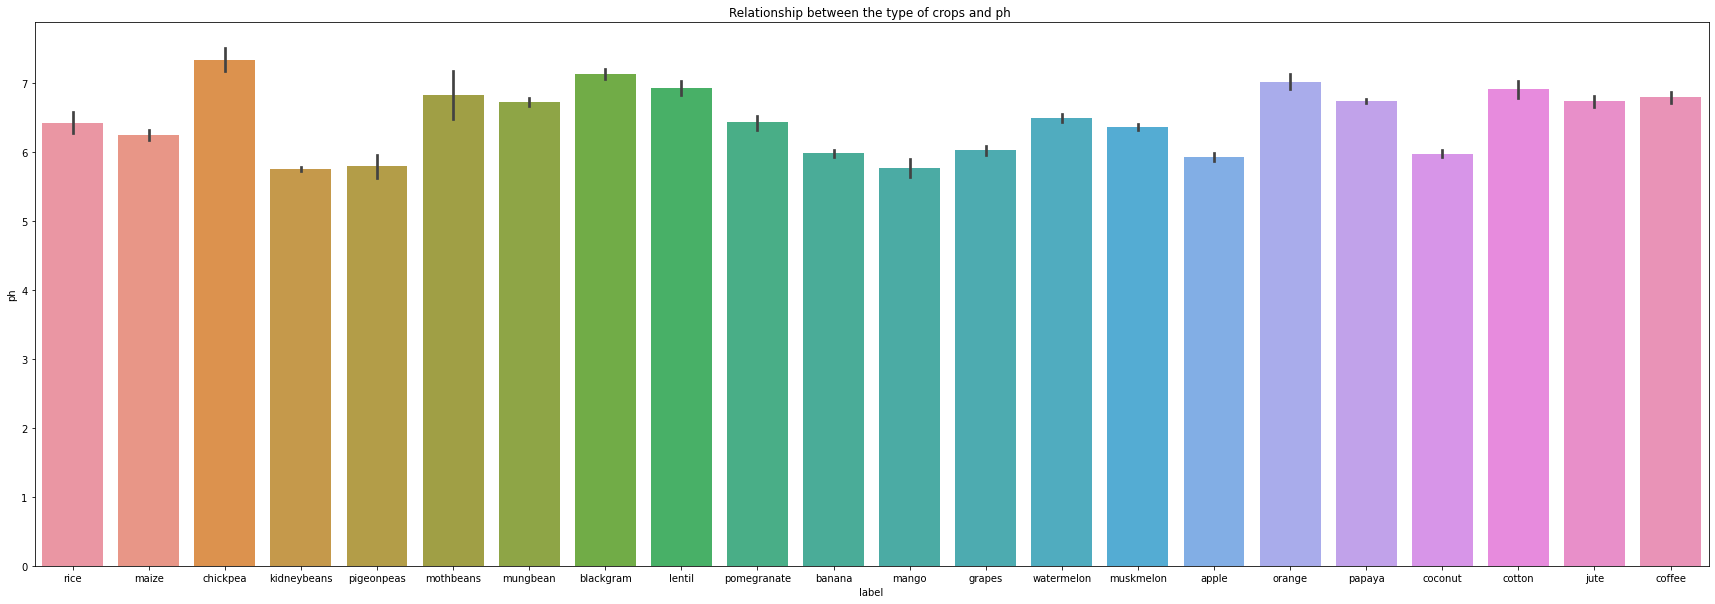

In [14]:
plt.figure(figsize=(30,10))
sns.barplot(y = df['ph'], x = df['label']).set_title('Relationship between the type of crops and ph ')

From this bar chart, we can see that chickpea crop requires the highest ph.

Text(0.5, 1.0, 'Relationship between the type of crops and rainfall ')

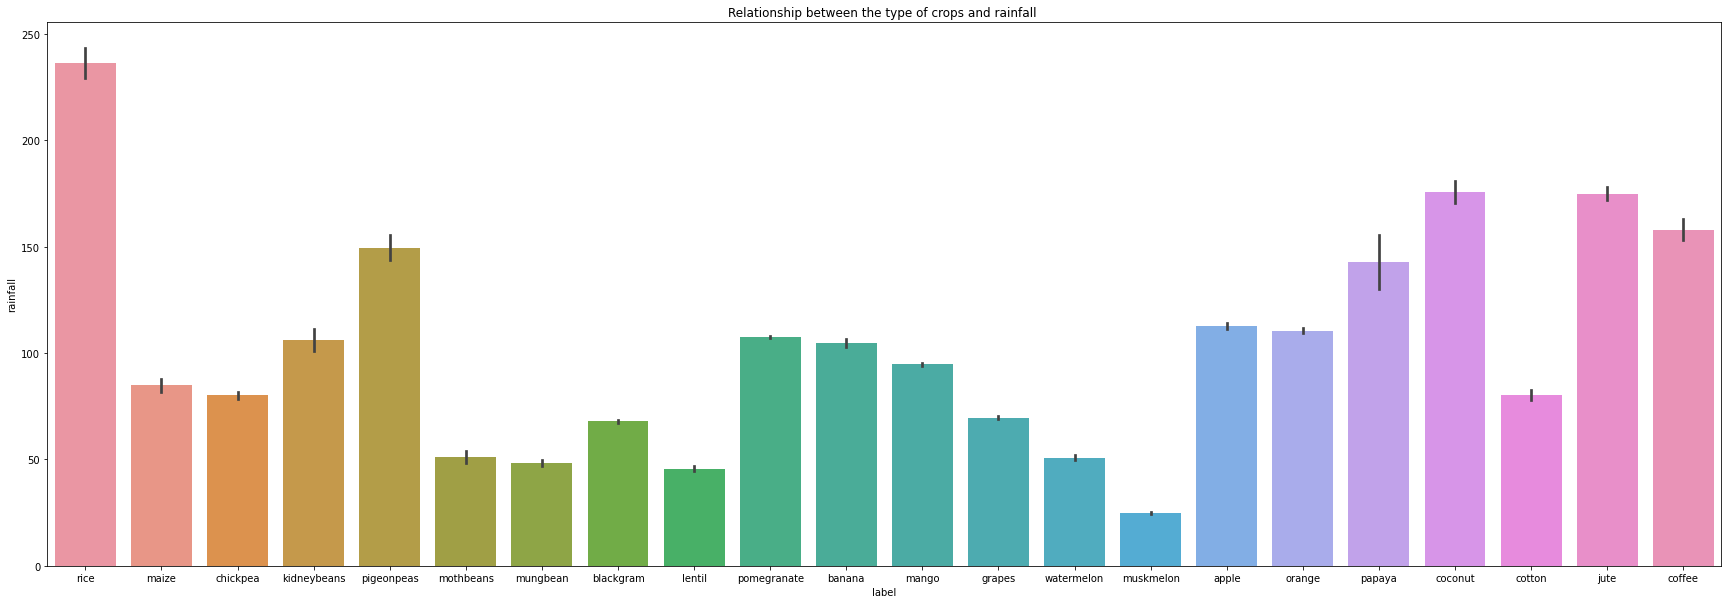

In [15]:
plt.figure(figsize=(30,10))
sns.barplot(y = df['rainfall'], x = df['label']).set_title('Relationship between the type of crops and rainfall ')

From this bar chart, we can see that rice crop requires the most rainfall.

In [16]:
#creates correlation matrix
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

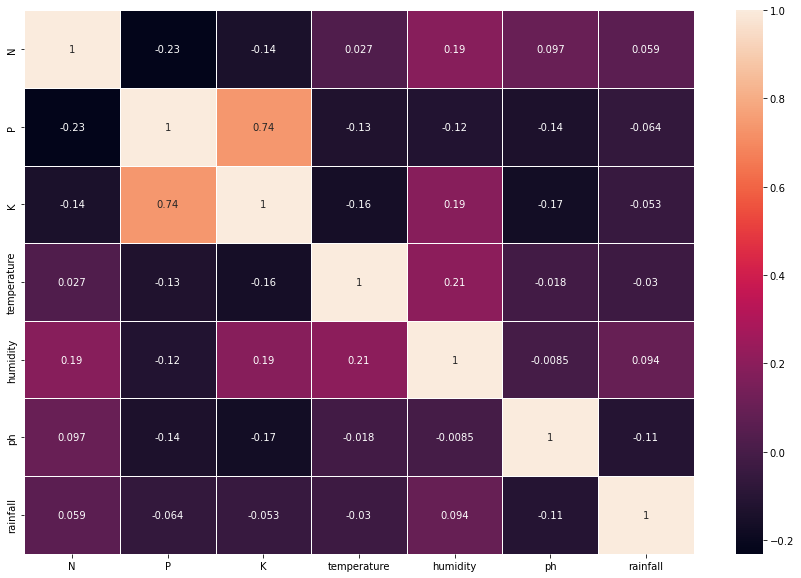

In [17]:
#correlation
plt.subplots(figsize=(15,10))  
sns.heatmap(df.corr(), linewidths=.5, annot=True,)

Correlation matrix indicates their association. Here are the correlations (absolute value):
1) K: 2.453

2) P: 2.424

3) Humidity: 1.8125

4) N: 1.743

5) Temperature: 1.575

6) pH: 1.5435

7) rainfall: 1.3569

# <center> Model Building <center> #

In [18]:
# Split-out validation dataset
array = df.to_numpy()
X = array[:,0:7]
y = array[:,7] #by index (target)

#print(y)

validation_size = 0.30 #validation dataset
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

# print(X_train)
# print(y_train)

### Exploring a variety of models ###

In [19]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'


#spot check algorothms
models = []
#models.append(('LR', LogisticRegression(solver='lbfgs', max_iter = 1000))) #0.967532
#models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000))) #0.966234
#models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 100, dual=False))) #0.959740
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(max_depth=20, random_state=7)))
#models.append(('GBC', GradientBoostingClassifier()))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, shuffle = True, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.968831 (0.011172)
KNN: 0.982468 (0.015380)
CART: 0.985714 (0.011172)
NB: 0.994805 (0.006362)
SVM: 0.098052 (0.034046)
RF: 0.994156 (0.004545)


In [20]:
# Make predictions on validation dataset
NB_1 = GaussianNB()
NB_1.fit(X_train, y_train)

predictions = NB_1.predict(X_validation)
print("Test Accuracy:")
print(accuracy_score(y_validation, predictions)) 
print()
print("Confusion matrix:")
print(confusion_matrix(y_validation, predictions))
print()
print("Classification report:")
print(classification_report(y_validation, predictions)) #always take the validation results

Test Accuracy:
0.9939393939393939

Confusion matrix:
[[27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 32  0  0 

# <center> Grid search <center> #

Grid search is used to fine tune hyper-parameters.

In [3]:
# Split-out validation dataset
array = df.to_numpy()
X = array[:,0:7]
y = array[:,7] #by index (target)

validation_size = 0.30 #validation dataset
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [8]:
#Getting the optimal hyper-parameters
#Classifier Pipeline
pipeline = Pipeline([
    ('clf', GaussianNB())
])

# Parameters we want to try
parameters = {
    'clf__priors': [None],
    'clf__var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

model_A = cv.fit(X_train, y_train)
y_pred_gnb = cv.predict(X_validation)

print(cv.best_params_)

{'clf__priors': None, 'clf__var_smoothing': 1e-08}


var_smoothing, artificially adds a user-defined value to the distribution's variance (whose default value is derived from the training data set). This essentially widens (or "smooths") the curve and accounts for more samples that are further away from the distribution mean

https://www.google.com/search?q=%27var_smoothing%27%3A+6.579332246575683e-05&hl=en&sxsrf=APq-WBuCjwgzu4ypM_tOj1Zsvdj96x2BAw%3A1644355577480&source=hp&ei=-d8CYq7LG4zCz7sP8cCFsAY&iflsig=AHkkrS4AAAAAYgLuCQGZe5bcK_QSAPrmJXfuw-_tpzTY&ved=0ahUKEwjuq9DwhfH1AhUM4XMBHXFgAWYQ4dUDCAk&uact=5&oq=%27var_smoothing%27%3A+6.579332246575683e-05&gs_lcp=Cgdnd3Mtd2l6EANQAFgAYNsGaABwAHgAgAE9iAE9kgEBMZgBAKABAqABAQ&sclient=gws-wiz

In [9]:
NB_2 = GaussianNB(priors = None,var_smoothing = 1e-08 )

NB_2.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-08)

In [10]:
print(f'Test accuracy: {NB_2.score(X_validation,y_validation)}')
print(f'Train accuracy: {NB_2.score(X_train,y_train)}')

Test accuracy: 0.9939393939393939
Train accuracy: 0.9948051948051948


# <center> Feature Selection </center> #

Use feature selection to try see if can increase accuracy.

## Anova ##

In [25]:
#feature selection - anova

# configure to select all features
# f_classif - Compute the ANOVA F-value for the provided sample. 
# F value is the variation between the sample means divided by the variance of the corresponding sample.
# SelectKBest - Selects the most relevant features
# k - Number of top features to select, in this call 'all' of the features
fs = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
fs.fit(X_train, y_train)

# transform train input data
X_train_fs = fs.transform(X_train)

# transform test input data
X_validation_fs = fs.transform(X_validation)


# These are the feature labels from our data set
feature_labels = np.array(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])


# what are scores for the features
for i in range(len(fs.scores_)):
    print("{} - {:.2f}".format(feature_labels[i], fs.scores_[i] ))
    
# plot the scores
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

N - 638.46
P - 1368.30
K - 19726.91
temperature - 74.98
humidity - 2131.99
ph - 39.85
rainfall - 421.82


Rank:

    1) K (19726.91)
    
    2) humidity (2131.99)
    
    3) P (1368.30)
    
    4) N (638.46)
    
    5) Rainfall (421.82)
    
    6) temperature (74.98)
    
    7) ph (39.85)

# <center> Feature engineering </center> #

In [26]:
#binning for K (using min and max) - most important
K_bins = np.linspace(5 , 205 , 6)
K_bins

array([  5.,  45.,  85., 125., 165., 205.])

0       1
1       1
2       1
3       1
4       1
       ..
2195    1
2196    1
2197    1
2198    1
2199    1
Name: K_bins, Length: 2200, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']


Text(0.5, 0, 'Binning for K')

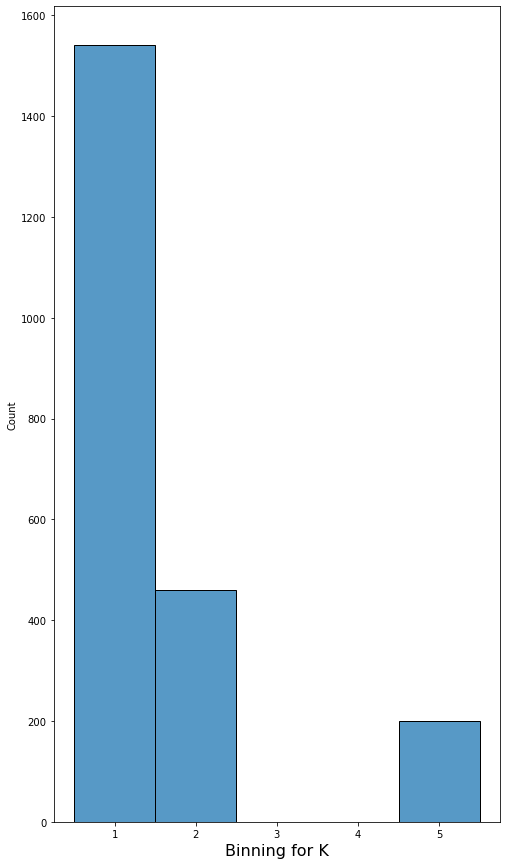

In [27]:
#labels = ['Very High', 'High', 'Medium', 'Low', 'Very Low']
bin_labels = ['1', '2', '3', '4', '5']
df['K_bins'] = pd.cut(df['K'], bins=K_bins, labels=bin_labels, include_lowest = True)


#print(K_bins)
print(df['K_bins'])

#sns.barplot(x="day", y="total_bill", data=tips)
sns.histplot(df['K_bins'], bins=5)
plt.xlabel('Binning for K', fontsize=16)

This bar graph above shows the number(count) of crops under each of these bins.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   object  
 8   K_bins       2200 non-null   category
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 140.0+ KB


Check if there are any null values after binning.

In [29]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,K_bins
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1


In [30]:
features_df = df.copy()
features_df

,N,P,K,temperature,humidity,ph,rainfall,label,K_bins
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1


In [31]:
del features_df["label"]
del features_df["K"]
features_df

,N,P,temperature,humidity,ph,rainfall,K_bins
0,90,42,20.879744,82.002744,6.502985,202.935536,1
1,85,58,21.770462,80.319644,7.038096,226.655537,1
2,60,55,23.004459,82.320763,7.840207,263.964248,1
3,74,35,26.491096,80.158363,6.980401,242.864034,1
4,78,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...
2195,107,34,26.774637,66.413269,6.780064,177.774507,1
2196,99,15,27.417112,56.636362,6.086922,127.924610,1
2197,118,33,24.131797,67.225123,6.362608,173.322839,1
2198,117,32,26.272418,52.127394,6.758793,127.175293,1


### Test accuracy after feature engineering ###

In [32]:
# Split-out validation dataset
# array = df.to_numpy()
# X = array[:,0:9]
# y = array[:,7] #by index #target

array = features_df.to_numpy()
X = array[:,0:7]
y = df['label'].values #by index #target

validation_size = 0.30 #validation dataset
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

# print(X_train)
# print(y_train)

In [33]:
NB_3 = GaussianNB(priors = None,var_smoothing = 1e-08 )

NB_3.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-08)

In [34]:
print(f'Test accuracy: {NB_3.score(X_validation,y_validation)}')
print(f'Train accuracy: {NB_3.score(X_train,y_train)}')

Test accuracy: 0.9863636363636363
Train accuracy: 0.987012987012987


# <center> Other methods of improvement: dimensionality reduction strategies </center> #

## Low variance filter ##

Values in columns with low varience would not be very informative since they would all be having roughly the same values. 

From anova feature selection, we can see that the variable 'ph' has the lowest varience amongst the variables.

In [7]:
features_df = df.copy()
features_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [8]:
del features_df["label"]
del features_df["ph"]
features_df

,N,P,K,temperature,humidity,rainfall
0,90,42,43,20.879744,82.002744,202.935536
1,85,58,41,21.770462,80.319644,226.655537
2,60,55,44,23.004459,82.320763,263.964248
3,74,35,40,26.491096,80.158363,242.864034
4,78,42,42,20.130175,81.604873,262.717340
...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,177.774507
2196,99,15,27,27.417112,56.636362,127.924610
2197,118,33,30,24.131797,67.225123,173.322839
2198,117,32,34,26.272418,52.127394,127.175293


### Test accuracy after low variance filter ###

In [9]:
# Split-out validation dataset

array = features_df.to_numpy()
X = array[:,0:6]
y = df['label'].values #by index #target

validation_size = 0.30 #validation dataset
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [10]:
NB_4 = GaussianNB(priors = None,var_smoothing = 1e-08 )

NB_4.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-08)

In [11]:
print(f'Test accuracy: {NB_4.score(X_validation,y_validation)}')
print(f'Train accuracy: {NB_4.score(X_train,y_train)}')

Test accuracy: 0.9878787878787879
Train accuracy: 0.9935064935064936


# <center> Make Predictions on Validation Set</center> #

The final model chosen will be the naive bayes model with optimal hyper parameters after grid search

In [7]:
# Make predictions on validation dataset
model = GaussianNB(priors = None,var_smoothing = 1e-08 )
model.fit(X_train, y_train)

predictions = model.predict(X_validation)
print("Test Accuracy:")
print(accuracy_score(y_validation, predictions)) 
print()
print("Confusion matrix:")
print(confusion_matrix(y_validation, predictions))
print()
print("Classification report:")
print(classification_report(y_validation, predictions)) #always take the validation results

Test Accuracy:
0.9939393939393939

Confusion matrix:
[[27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 32  0  0 

In [8]:
#N, P, K, temperature, humidity, ph, rainfall
print(model.predict([[100,51,32,26, 80, 7, 95]]))

['cotton']


# <center> Deployment to flask </center> #

In [9]:
import joblib
joblib.dump(model,'models/projectModel.pkl')

['models/projectModel.pkl']